In [ ]:
import numpy as np

In [ ]:
class Perceptron:
  def __init__(self,lr,epochs):
    self.lr = lr
    self.epochs = epochs
    self.activation_func = self._unit_step_func
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    n_samples,n_features = X.shape

    # parameter initialization
    self.weights = np.zeros(n_features)
    self.bias = 0

    y_ = [1 if i > 0 else 0 for i in y]

    for _ in range(self.epochs):

      for idx,x_i in enumerate(X):
        output = np.dot(x_i,self.weights) + self.bias
        y_pred = self.activation_func(output)



        # perceptron update rule

        update = self.lr * (y_[idx] - y_pred)

        self.weights += update*x_i
        self.bias += update

  def predict(self,X):
    linear_output = np.dot(X,self.weights) + self.bias
    y_pred = self.activation_func(linear_output)
    return y_pred



  def _unit_step_func(self,x):
    return np.where(x>=0 ,1 ,0)




In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [ ]:
def accuracy(y_true,y_pred):
  acc = np.mean(y_true == y_pred)
  return acc


In [ ]:
X,y = datasets.make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=4,random_state=2)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [ ]:
p = Perceptron(lr = 0.1,epochs = 100)
p.fit(X_train,y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

Perceptron classification accuracy 0.8


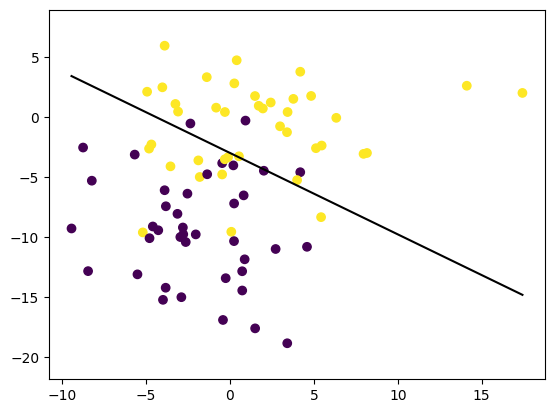

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.scatter(X_train[:,0],X_train[:,1],marker = "o",c = y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()